In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paper')

In [2]:
def get_centered_grid(xlist, ylist, poolresults):  
    # assumes uniformly spaced values in x and y (can have different lengths)
    dx = xlist[1]-xlist[0]
    dy = ylist[1]-ylist[0]

    xgrid = [x - dx/2 for x in xlist] + [xlist[-1]+dx/2]
    ygrid = [y - dy/2 for y in ylist] + [ylist[-1]+dy/2]

    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.array(poolresults).reshape(len(ylist),len(xlist))

    return X,Y,Z

def relativelyprime(num1, num2):
    mn = min(num1, num2) 
    for i in range(1, mn+1): 
         if num1%i==0 and num2%i==0: 
             hcf = i 
    if hcf == 1: 
         return True
    else: 
         return False
        
def ecross(j, k):
    return 2*k/(3*j)

In [3]:
mu=1e-4
eps = 2*mu/3 # each inner planet is mu/3, so total = 2mu/3
Pmin = 1.35
Pmax = 1.48
emax = 0.2
NPs = 800
Nes = 800
P21s = np.linspace(Pmin, Pmax, NPs)
es = np.linspace(0, emax, Nes)
deltas = (1-P21s**(-2/3))/eps**(1/4)
ecs = 1 - P21s**(-2/3)
h = [0, 0.535, 0.426, 0.420, 0.454, 0.519, 0.613, 0.742, 0.914, 1.143, 1.445] # coefficients for k order resonances
jmax=20
kmax=5

# Make IKEA color map

In [4]:
from matplotlib.colors import LinearSegmentedColormap

ikeablue_r = 36/256
ikeablue_g = 86/256
ikeablue_b = 158/256

ikeagold_r = 245/256
ikeagold_g = 219/256
ikeagold_b = 76/256

cdict = {'red':   [[0.,  ikeablue_r, ikeablue_r],
                   [1.,  ikeagold_r, ikeagold_r]],
         'green': [[0.,  ikeablue_g, ikeablue_g],
                   [1.,  ikeagold_g, ikeagold_g]],
         'blue':  [[0.,  ikeablue_b, ikeablue_b],
                   [1.,  ikeagold_b, ikeagold_b]]}

ikeacmap = LinearSegmentedColormap('ikeacmap', segmentdata=cdict, N=256)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: cm


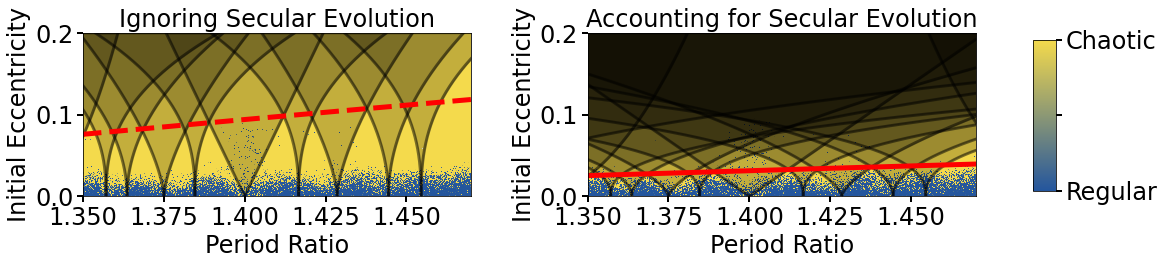

In [5]:
plt.style.use('paper')
fig, axarr = plt.subplots(figsize=(16, 3), ncols=2)

ax = axarr[0]
res2p = np.load('mixedeigenmode_unnormalized.npy')

X,Y,Z = get_centered_grid(P21s, es, np.array(res2p)-2)
im = ax.pcolormesh(X, Y, Z, vmin=0, vmax=1, cmap=ikeacmap, rasterized=True)

res = []
for k in range(1,kmax+1):
    for j in range(2*k+1, jmax):
        if not relativelyprime(j, k):
            continue
        P21 = j/(j-k) # P2/P1
        if P21 < P21s.max()+0.05 and P21 > P21s.min()-0.05:
            ec = ecross(j,k)
            dPs = (j/(j-k))**(2/3)*2*np.sqrt(3)*h[k]**(1/2)*eps**(1/2)*(es/ec)**(k/2)
            ax.plot(P21+dPs, es, 'k', alpha=0.5)
            ax.plot(P21-dPs, es, 'k', alpha=0.5)
            ax.fill_betweenx(es, P21-dPs, P21+dPs, alpha=0.2, color='k')
        if P21 < P21s.max() and P21 > P21s.min():
            res.append((j, k))
ax.plot(P21s, np.exp(-2.2*deltas**(-4/3))*ecs, lw=5, color='red', linestyle='--')

ax.set_xlabel(r"Period Ratio", fontsize=24)
ax.set_ylabel(r"Initial Eccentricity", fontsize=24)
ax.set_xlim([1.35, 1.47])
ax.set_ylim([es.min(), es.max()])

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_title('Ignoring Secular Evolution')
######

ax = axarr[1]
res2p = np.load('mixedeigenmode_unnormalized.npy')

X,Y,Z = get_centered_grid(P21s, es, np.array(res2p)-2)
im = ax.pcolormesh(X, Y, Z, vmin=0, vmax=1, cmap=ikeacmap, rasterized=True)

res = []
for k in range(1,kmax+1):
    for j in range(2*k+1, jmax):
        if not relativelyprime(j, k):
            continue
        P21 = j/(j-k) # P2/P1
        if P21 < P21s.max()+0.05 and P21 > P21s.min()-0.05:
            ec = ecross(j,k)
            dPs = (j/(j-k))**(2/3)*2*np.sqrt(3)*h[k]**(1/2)*eps**(1/2)*(3*es/ec)**(k/2)
            ax.plot(P21+dPs, es, 'k', alpha=0.5)
            ax.plot(P21-dPs, es, 'k', alpha=0.5)
            ax.fill_betweenx(es, P21-dPs, P21+dPs, alpha=0.2, color='k')
        if P21 < P21s.max() and P21 > P21s.min():
            res.append((j, k))
ax.plot(P21s, np.exp(-2.2*deltas**(-4/3))*ecs/3, lw=5, color='red')

ax.set_xlabel(r"Period Ratio", fontsize=24)
ax.set_ylabel(r"Initial Eccentricity", fontsize=24)
ax.set_xlim([1.35, 1.47])
ax.set_ylim([es.min(), es.max()])


fig.subplots_adjust(wspace=0.3, right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.tick_params(labelsize=24)
cb.set_ticks([im.colorbar.vmin + t*(im.colorbar.vmax-im.colorbar.vmin) for t in cb.ax.get_yticks()])
cb.set_ticklabels(['Regular', '', 'Chaotic'])

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_title('Accounting for Secular Evolution')
fig.savefig('overlap.pdf', bbox_inches='tight')